In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# 데이터 준비


df = pd.read_csv("data/final_data.csv")
# 입력 변수와 출력 변수 분리

df

,Unnamed: 0,war,타수,득점,안타,2루타,3루타,홈런,타점,도루성공,...,희생타,희생플라이,타율,출루율,장타율,R/ePA,wRC+,rangeRAA,종합 RAA,WAAwoPOS
0,0,5.75,250.0,55.0,103.0,23.0,1.0,19.0,64.0,11.0,...,0.0,3.0,0.412,0.497,0.740,0.163,237.9,-2.04,-2.04,-0.197
1,1,4.38,284.0,54.0,97.0,20.0,5.0,8.0,47.0,9.0,...,0.0,4.0,0.342,0.428,0.532,0.084,178.6,-2.74,-2.74,-0.265
2,2,3.70,277.0,47.0,76.0,18.0,1.0,2.0,25.0,13.0,...,4.0,5.0,0.274,0.396,0.368,0.019,126.8,4.58,4.58,0.442
3,3,3.46,214.0,42.0,72.0,15.0,3.0,3.0,27.0,34.0,...,2.0,1.0,0.336,0.454,0.477,0.081,176.7,-0.08,-0.08,-0.008
4,4,3.42,270.0,46.0,78.0,16.0,1.0,13.0,51.0,6.0,...,0.0,1.0,0.289,0.399,0.500,0.051,152.2,-0.11,1.60,0.155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,9151,-0.94,81.0,10.0,16.0,3.0,1.0,1.0,7.0,1.0,...,0.0,0.0,0.198,0.270,0.296,-0.058,55.1,-0.46,-0.51,-0.049
8159,9152,-0.99,305.0,22.0,75.0,10.0,0.0,2.0,30.0,0.0,...,1.0,2.0,0.246,0.326,0.298,-0.033,75.9,-5.02,-4.64,-0.449
8160,9153,-1.03,73.0,11.0,11.0,1.0,1.0,2.0,9.0,2.0,...,1.0,0.0,0.151,0.225,0.274,-0.103,17.4,-1.50,-0.35,-0.034
8161,9154,-2.48,319.0,30.0,71.0,11.0,0.0,5.0,32.0,1.0,...,2.0,5.0,0.223,0.279,0.304,-0.060,53.6,-10.17,-8.40,-0.814


In [3]:
X = df.drop('war', axis=1)
y = df['war']

# 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
rf = RandomForestRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV 사용
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring=['neg_mean_squared_error', 'r2'], refit='r2', verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f'Best parameters for RandomForest: {grid_search_rf.best_params_}')
print(f'Best R^2 score for RandomForest: {grid_search_rf.best_score_}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for RandomForest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R^2 score for RandomForest: 0.9338760114314134


In [5]:
# AdaBoost 모델 학습
ab = AdaBoostRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearchCV 사용
grid_search_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab, cv=5, n_jobs=-1, scoring=['neg_mean_squared_error', 'r2'], refit='r2', verbose=2)
grid_search_ab.fit(X_train, y_train)

print(f'Best parameters for AdaBoost: {grid_search_ab.best_params_}')
print(f'Best R^2 score for AdaBoost: {grid_search_ab.best_score_}')


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 100}
Best R^2 score for AdaBoost: 0.8728119730129824


In [6]:
# GradientBoosting 모델 학습
gb = GradientBoostingRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV 사용
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring=['neg_mean_squared_error', 'r2'], refit='r2', verbose=2)
grid_search_gb.fit(X_train, y_train)

print(f'Best parameters for GradientBoosting: {grid_search_gb.best_params_}')
print(f'Best R^2 score for GradientBoosting: {grid_search_gb.best_score_}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best R^2 score for GradientBoosting: 0.9471545534837873


In [7]:
# XGBoost 모델 학습
xgb_model = XGBRegressor(random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# GridSearchCV 사용
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, scoring=['neg_mean_squared_error', 'r2'], refit='r2', verbose=2)
grid_search_xgb.fit(X_train, y_train)

print(f'Best parameters for XGBoost: {grid_search_xgb.best_params_}')
print(f'Best R^2 score for XGBoost: {grid_search_xgb.best_score_}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Best R^2 score for XGBoost: 0.9480905218854847


In [8]:
# CatBoost 모델 학습
cat_model = CatBoostRegressor(random_seed=42, verbose=0)

# 하이퍼파라미터 그리드 설정
param_grid_cat = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# GridSearchCV 사용
grid_search_cat = GridSearchCV(estimator=cat_model, param_grid=param_grid_cat, cv=5, n_jobs=-1, scoring=['neg_mean_squared_error', 'r2'], refit='r2', verbose=2)
grid_search_cat.fit(X_train, y_train)

print(f'Best parameters for CatBoost: {grid_search_cat.best_params_}')
print(f'Best R^2 score for CatBoost: {grid_search_cat.best_score_}')


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for CatBoost: {'depth': 6, 'iterations': 1000, 'learning_rate': 0.1}
Best R^2 score for CatBoost: 0.9523747940512532


# cross_val_score, kfold


In [9]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

X = X_train
y = y_train


# StratifiedShuffleSplit 설정
sss_val = ShuffleSplit(n_splits=5,test_size=0.3, random_state=42)

# 모델 정의 및 하이퍼파라미터 설정
models = {
   'RandomForest': RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42),
    'AdaBoost': AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42),
    'XGBoost': XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9, random_state=42),
    'CatBoost': CatBoostRegressor(depth=6, iterations=1000, learning_rate=0.1, random_seed=42, verbose=0)
}

results = {}
results_mse = {}
results_r2 = {}

# 평가 지표 설정
scoring_mse = 'neg_mean_squared_error'
scoring_r2 = 'r2'

# 교차 검증 실시
for name, model in models.items():
    mse_scores = cross_val_score(model, X, y, cv=sss_val, scoring=scoring_mse)
    r2_scores = cross_val_score(model, X, y, cv=sss_val, scoring=scoring_r2)
    
    results_mse[name] = -mse_scores.mean()  # neg_mean_squared_error를 사용하므로 -를 붙여서 실제 mse로 변환
    results_r2[name] = r2_scores.mean()

# 결과 출력
print("Mean Squared Error (MSE) Results:")
for name, mse in results_mse.items():
    print(f"{name}: {mse}")

print("\nR^2 Score Results:")
for name, r2 in results_r2.items():
    print(f"{name}: {r2}")

# 모델 학습 및 최종 평가
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name} - Final Model MSE: {mse}, R^2: {r2}")


Mean Squared Error (MSE) Results:
RandomForest: 0.19412355957746094
AdaBoost: 0.3662491426969741
GradientBoosting: 0.154332325592182
XGBoost: 0.15521801023526832
CatBoost: 0.13765589862135935

R^2 Score Results:
RandomForest: 0.9337977275443464
AdaBoost: 0.8750350700858689
GradientBoosting: 0.9473684613267958
XGBoost: 0.94707156949009
CatBoost: 0.9530406336160325
RandomForest - Final Model MSE: 0.02519383525418323, R^2: 0.9912018019742205
AdaBoost - Final Model MSE: 0.33294541257343463, R^2: 0.8837287121217654
GradientBoosting - Final Model MSE: 0.03355920178548116, R^2: 0.9882804463902838
XGBoost - Final Model MSE: 0.03747568650103439, R^2: 0.9869127305286564
CatBoost - Final Model MSE: 0.01844993106228899, R^2: 0.9935569100373057


In [10]:
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X_test)  # test 데이터에 대해 예측
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Test Data MSE: {mse}, R^2: {r2}")

RandomForest - Test Data MSE: 0.18385084341917057, R^2: 0.9330876436993099
AdaBoost - Test Data MSE: 0.38090283207874925, R^2: 0.8613707419449476
GradientBoosting - Test Data MSE: 0.1466601326863161, R^2: 0.9466231708764082
XGBoost - Test Data MSE: 0.14896667148254775, R^2: 0.9457837080657703
CatBoost - Test Data MSE: 0.12835777163428683, R^2: 0.9532842994362872


# 변수 중요도

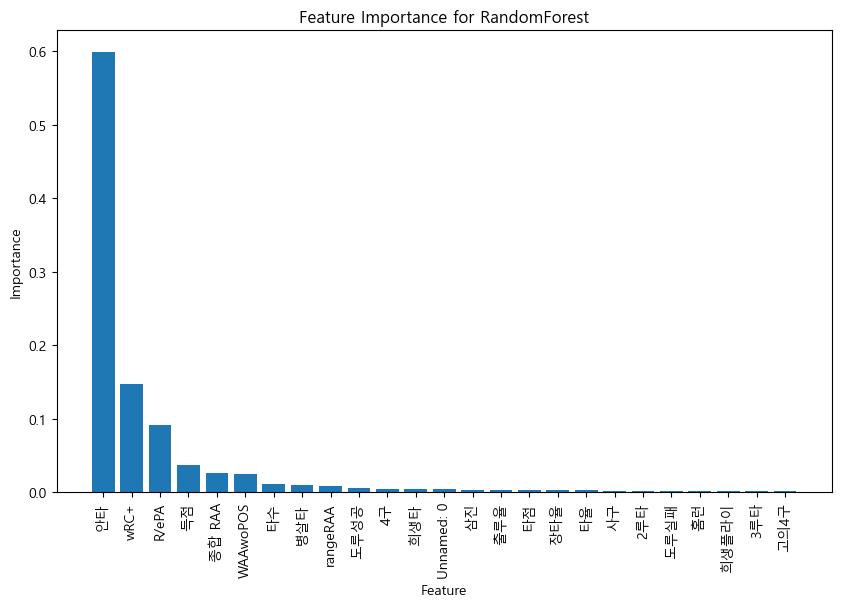

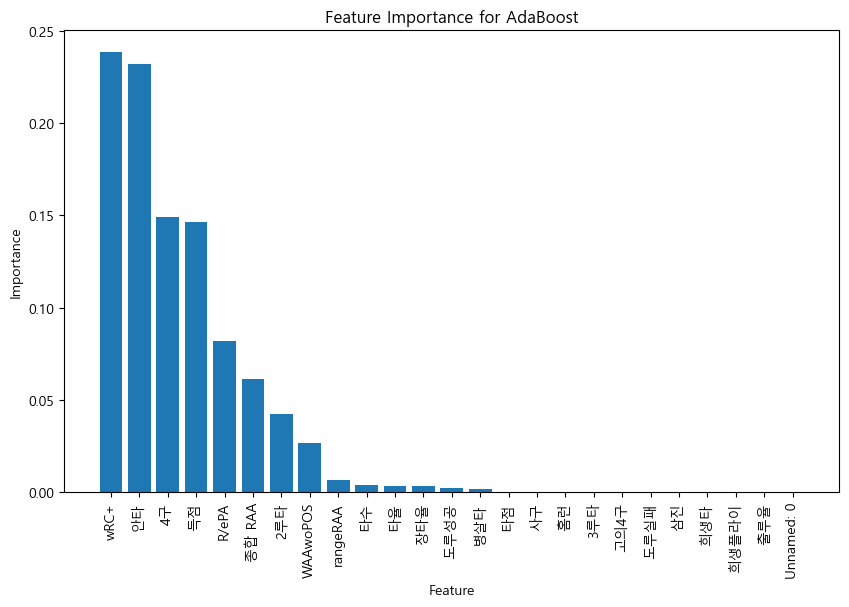

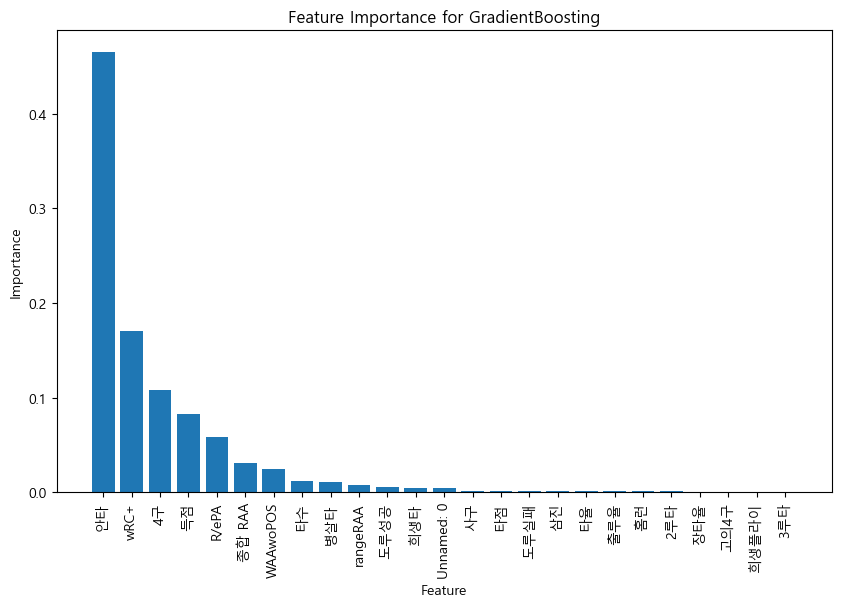

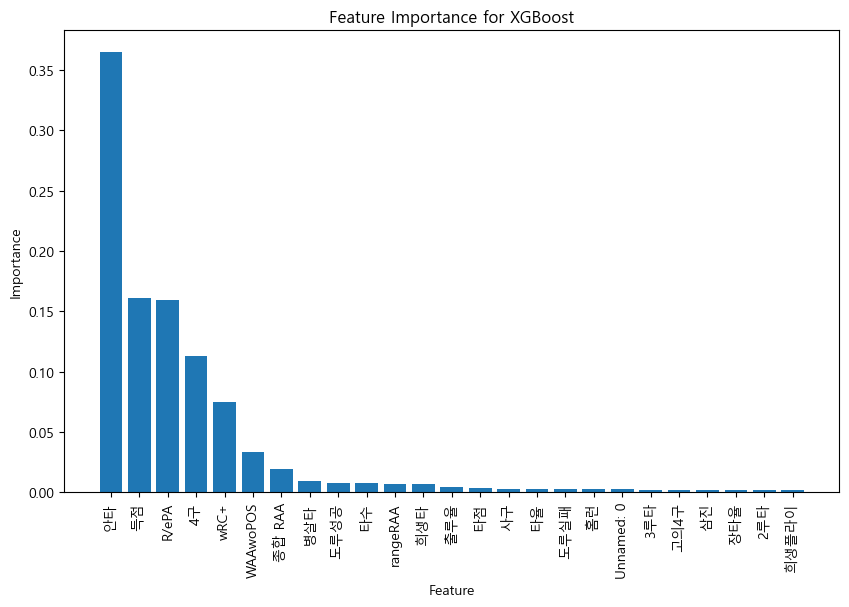

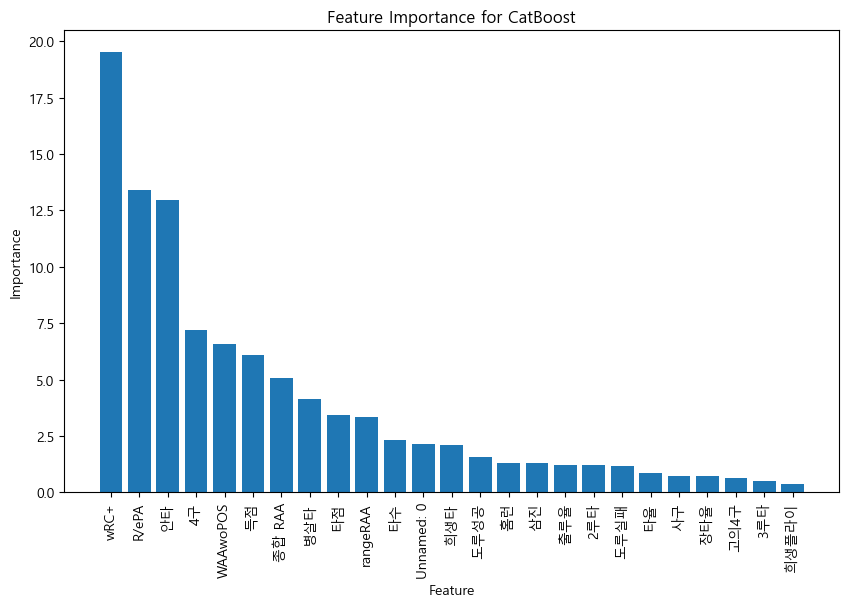

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 모델 학습 및 변수 중요도 추출
feature_importances = {}

for name, model in models.items():
    model.fit(X, y)
    
    if name in ['CatBoost']:
        feature_importances[name] = model.get_feature_importance()
    elif name in ['XGBoost']:
        feature_importances[name] = model.feature_importances_
    else:
        feature_importances[name] = model.feature_importances_

# 변수 중요도 시각화
for name, importance in feature_importances.items():
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance for {name}')
    plt.bar(range(X.shape[1]), importance[sorted_idx], align='center')
    plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

In [14]:
prediction = models["CatBoost"].predict(X_test)

c:\Users\jspar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


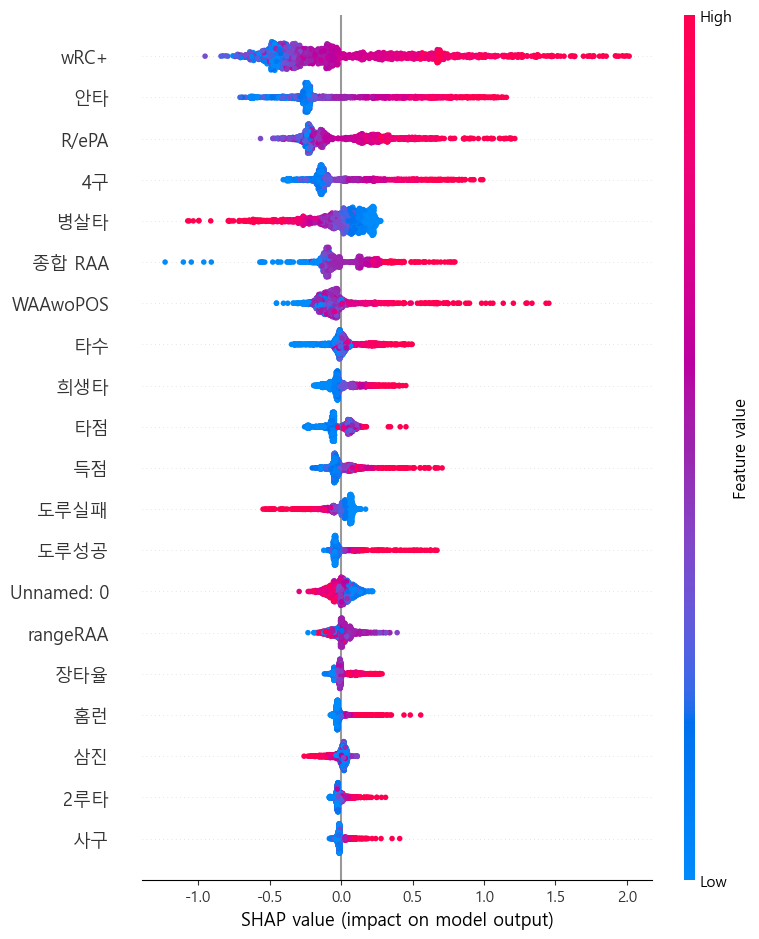

In [15]:
import matplotlib.pyplot as plt
import shap

import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


cb_model = models["CatBoost"]
# SHAP 값 계산
explainer = shap.TreeExplainer(cb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

# # 특정 인덱스에 대한 SHAP force plot 생성
# index_2 = 87
# shap.initjs()

# # Jupyter Notebook 환경에서 force plot을 상호작용형으로 표시
# shap.force_plot(explainer.expected_value, shap_values, X_test)


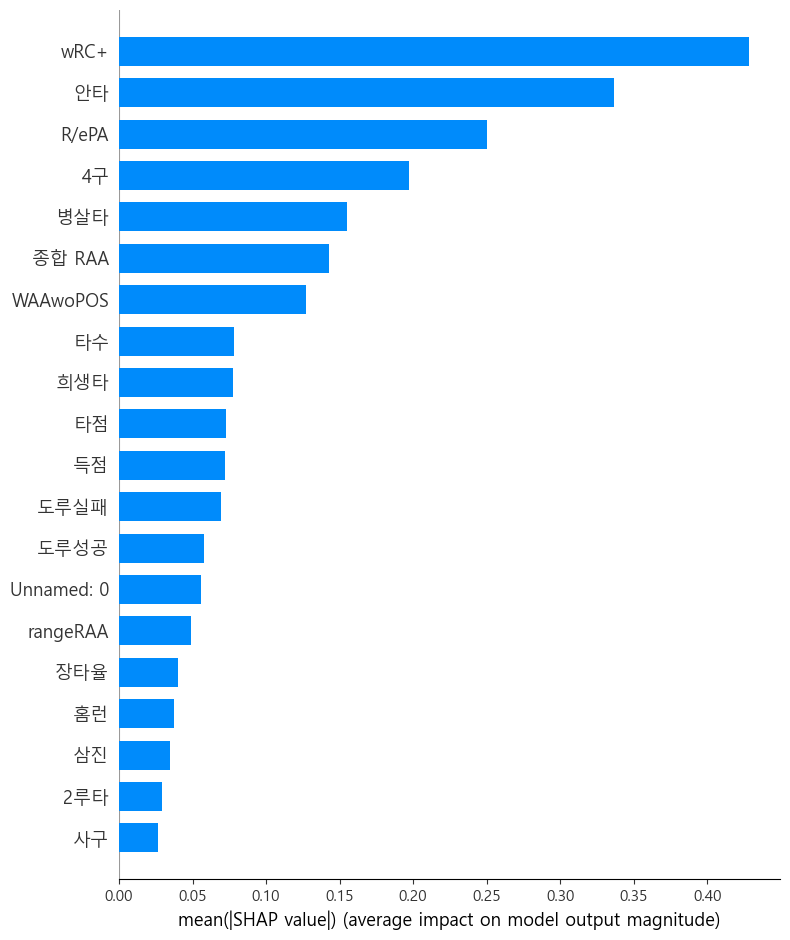

In [16]:
shap.summary_plot(shap_values, X_test,plot_type='bar', )


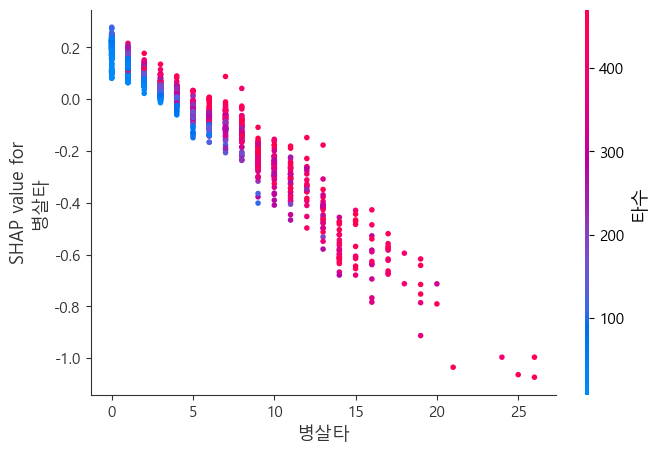

In [17]:
shap.dependence_plot("병살타", shap_values, X_test)


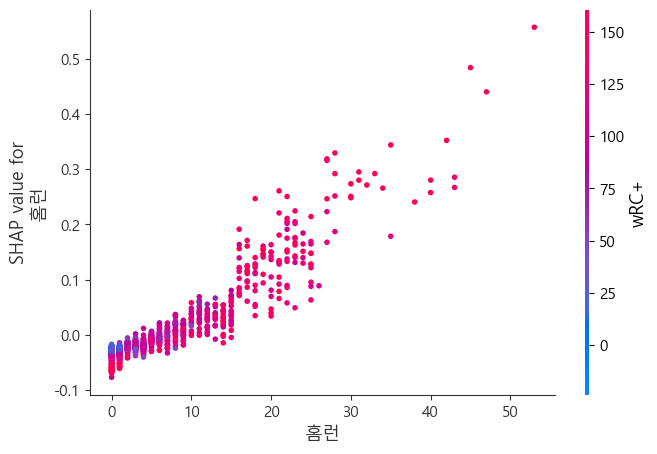

In [18]:
shap.dependence_plot("홈런", shap_values, X_test)


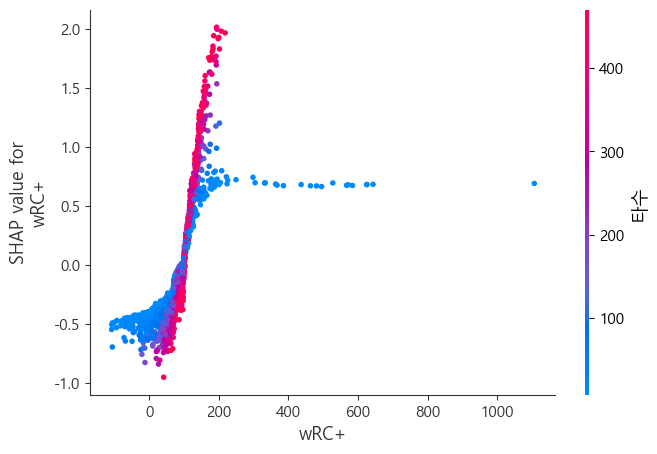

In [19]:
shap.dependence_plot("wRC+", shap_values, X_test)


In [20]:

shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, X_test)


In [21]:
index = 1460
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index])


In [23]:
index = 791
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index])

In [24]:
index = 983

shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index])

In [25]:
index = 539
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index])